In [85]:

import os 

import cv2
import pandas as pd
import numpy as np 
import utm
from scipy.spatial.transform import Rotation as R

In [145]:
file_path = '/home/ayon/thesis/data/Eiffel-Tower/2015/sfm/images.txt'


def save_navigation_data(file_path):
    if os.path.exists(file_path):
        data = []
        with open(file_path, 'r') as f:
            for index, line in enumerate(f):
                if index<4:
                    continue
            
                if index%2!=0:
                    continue
                
                line_content = line.split(' ')
                
                image_name = line_content[-1]
                QW = line_content[1]
                QX = line_content[2]
                QY = line_content[3]
                QZ = line_content[4]
                TX = line_content[5]
                TY = line_content[6]
                TZ = line_content[7]
                Camera_id = line_content[8]


                # get euler angles from quaternions
                r = R.from_quat([QW, QX, QY, QZ])
                Rz, Ry, Rx = r.as_euler('zyx', degrees=True)
                
                data.append([image_name[:-1], QW, QX, QY, QZ, TX, TY, TZ, Rx, Ry, Rz])

        # make the dataframe and process it for saving
        df = pd.DataFrame(data, columns=['image_name', 'QW', 'QX', 'QY', 'QZ', 'TX', 'TY', 'TZ', 'Rx', 'Ry', 'Rz'])
        df = df.sort_values(by='image_name')
        df = df.set_index('image_name')
        df = df.astype(float)
        return df
    else:
        print(f"The file '{file_path}' does not exist.")


df = save_navigation_data(file_path)
df.shape

(4914, 10)

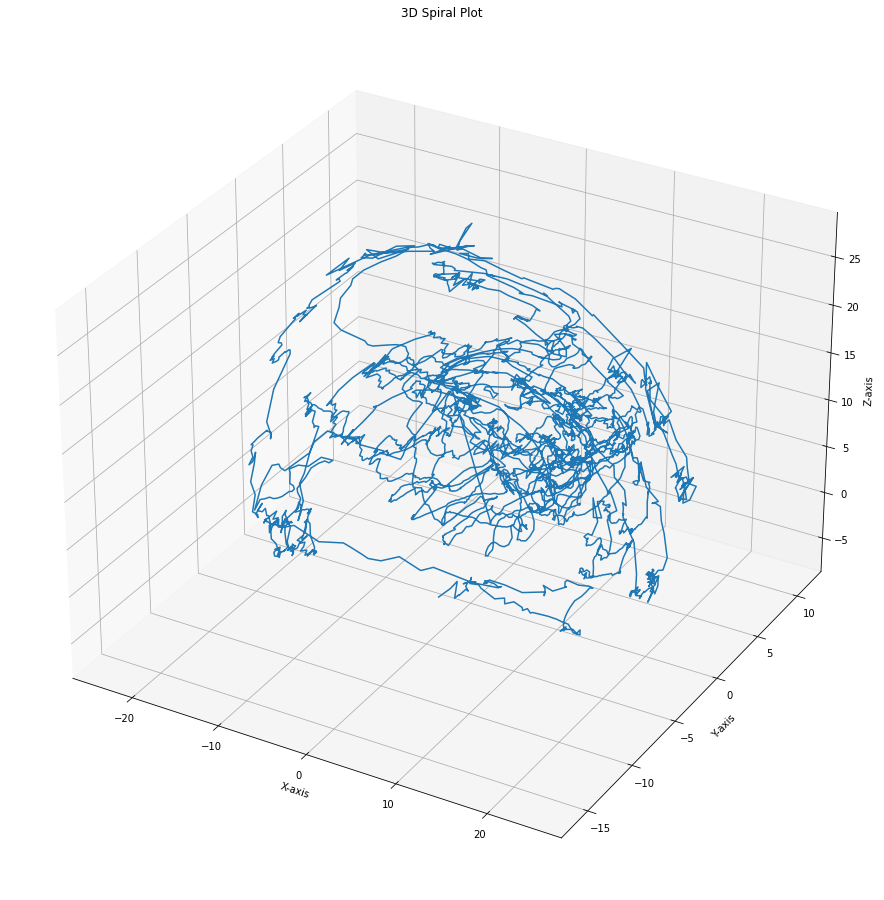

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df['TX']
y = df['TY']
z = df['TZ']
# Create a 3D axis
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D line
ax.plot(x, y, z, label='3D spiral')

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Spiral Plot')

# Show the plot
plt.show()


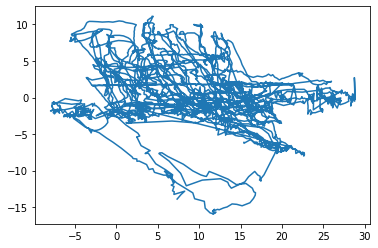

In [142]:
plt.plot(z,y)